<a href="https://colab.research.google.com/github/AnshikaaAgarwal/Clustering-On-Dummy-Datasets/blob/main/Image_Segmentation_Using_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans
import math
from sklearn.metrics import silhouette_score

Loading Image

In [2]:

image_path = '/content/imgcheck.jpg'
image = cv2.imread(image_path)
#Since cv2 reads in the form of BGR
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.size)

614196


In [3]:
image_arr = np.array(image)
print("Shape of Image :", image_arr.shape)
# Reshape the image to a 2D array of pixels (n_pixels, 3)
pixels = image_arr.reshape(-1, 3)
print("RGB value of each pixel :",pixels)
print(pixels.shape)


Shape of Image : (363, 564, 3)
RGB value of each pixel : [[13 14  9]
 [12 13  8]
 [12 13  8]
 ...
 [12 12 10]
 [12 12 10]
 [12 12 10]]
(204732, 3)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 2 clusters: 0.696


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 5 clusters: 0.491


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 6 clusters: 0.453


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 8 clusters: 0.418


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 10 clusters: 0.382


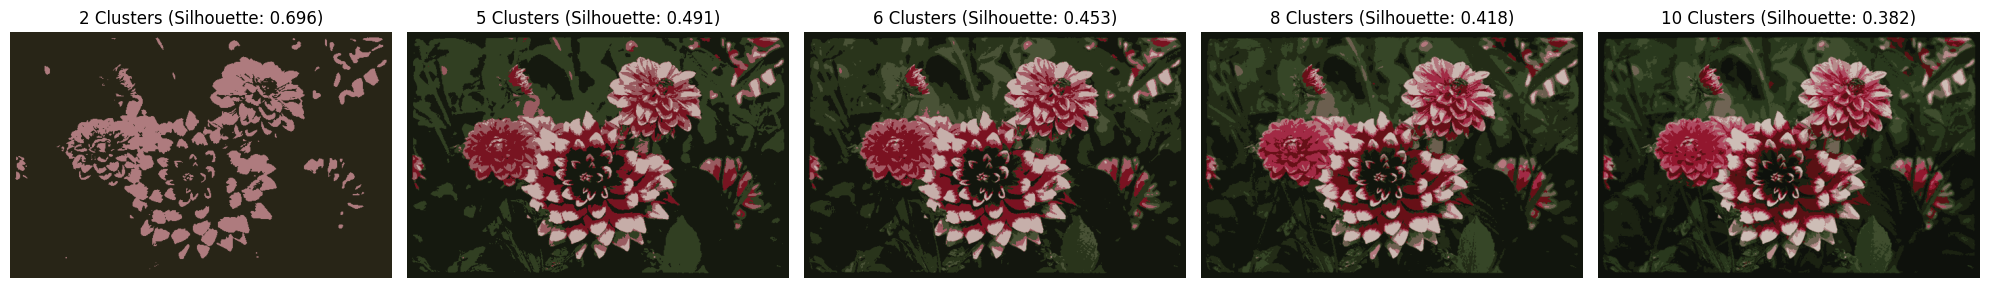

In [5]:

cluster_numbers = [2,5,6,8,10]
fig, axs = plt.subplots(1, 5, figsize=(20, 5))

for idx, n_clusters_multi in enumerate(cluster_numbers):

    kmeans_different = KMeans(n_clusters=n_clusters_multi, random_state=42)
    kmeans_different.fit(pixels)


    centroids_different = kmeans_different.cluster_centers_
    labels_different = kmeans_different.labels_


    clustered_pixels_different = centroids_different[labels_different]
    clustered_image_different = clustered_pixels_different.reshape(image.shape).astype(np.uint8)

    silhouette_avg = silhouette_score(pixels, labels_different)
    print(f'Silhouette score for {n_clusters_multi} clusters: {silhouette_avg:.3f}')

    axs[idx].imshow(clustered_image_different)
    axs[idx].set_title(f'{n_clusters_multi} Clusters (Silhouette: {silhouette_avg:.3f})')
    # axs[idx].set_title(f'{n_clusters_multi} Clusters')
    axs[idx].axis('off')

plt.tight_layout()
plt.show()




Applying K-Means
number of clusters used=5

In [7]:
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(pixels)
centroids = kmeans.cluster_centers_.astype(int)
labels = kmeans.labels_
print(labels)
print(labels.size)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[3 3 3 ... 3 3 3]
204732


the more the number of clusters the better it goes


In [8]:
clustered_pixels = centroids[labels]
clustered_img=clustered_pixels.reshape(image.shape)

RGB values of Centroids

In [9]:
print("Cluster centroids (RGB values):")
for i in range(len(centroids)):
    print(f"Centroid {i + 1}: {centroids[i]}")

Cluster centroids (RGB values):
Centroid 1: [49 63 34]
Centroid 2: [198 173 169]
Centroid 3: [153  91  97]
Centroid 4: [21 25 15]
Centroid 5: [120  20  33]


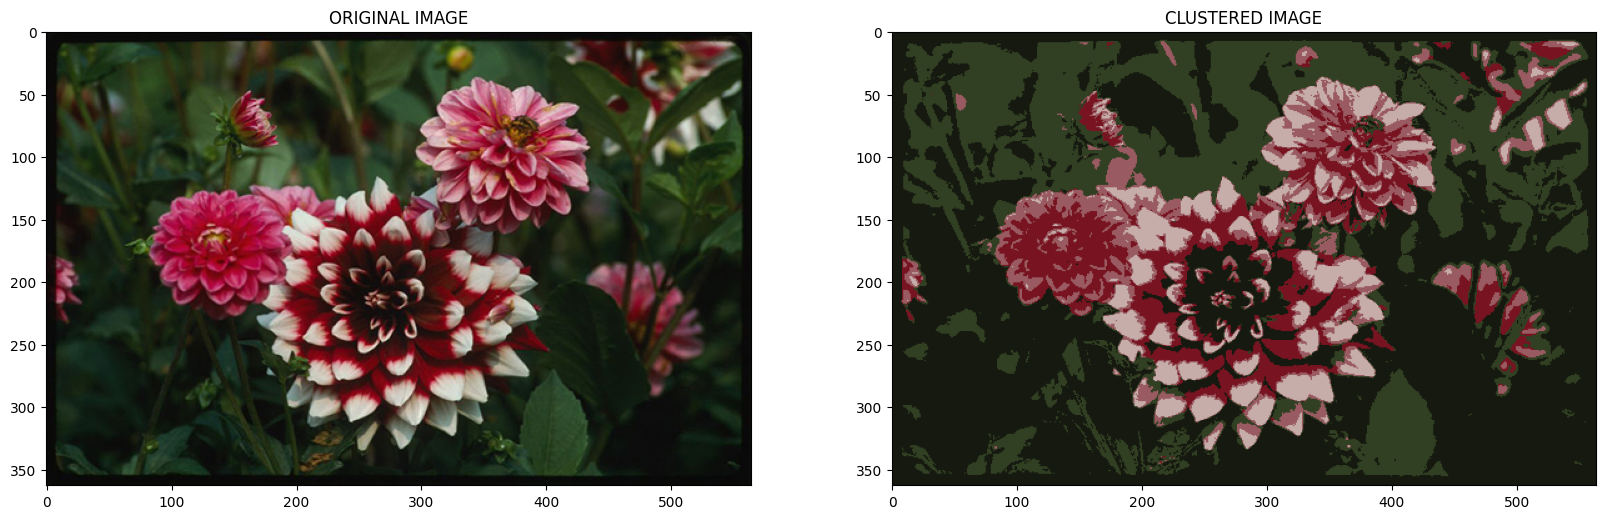

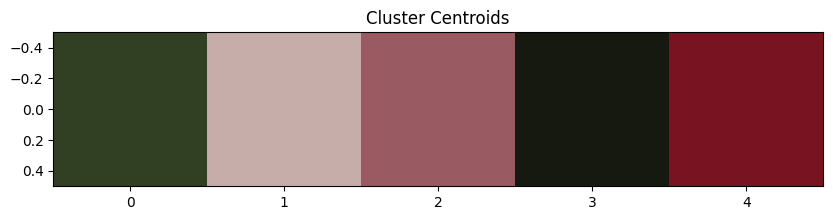

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].imshow(image)
axs[0].set_title('ORIGINAL IMAGE')

axs[1].imshow(clustered_img)
axs[1].set_title('CLUSTERED IMAGE')


centroid_colors = np.array(centroids, dtype=np.uint8).reshape(1, n_clusters, 3)
fig, ax = plt.subplots(figsize=(10, 2))
ax.imshow(centroid_colors)
ax.set_title('Cluster Centroids')
plt.show()


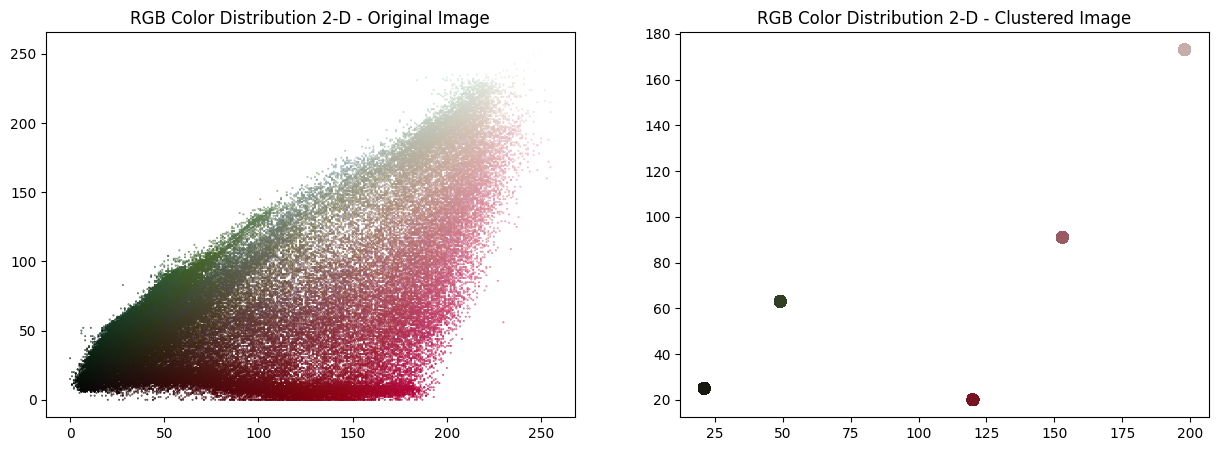

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# original image RGB plot
axs[0].scatter(pixels[:, 0], pixels[:, 1], c=pixels / 255.0, marker='.',s=0.5)
axs[0].set_title('RGB Color Distribution 2-D - Original Image')


# clustered image RGB plot
axs[1].scatter(clustered_pixels[:, 0], clustered_pixels[:, 1], c=clustered_pixels / 255.0, marker='.',s=250)
axs[1].set_title('RGB Color Distribution 2-D - Clustered Image')


plt.show()

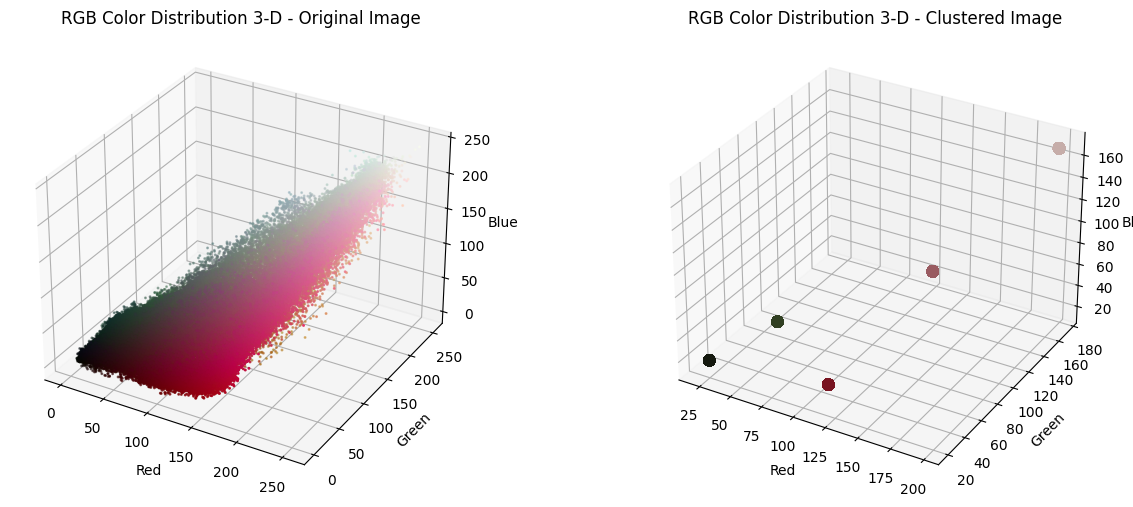

In [12]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 6))


ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(pixels[:, 0], pixels[:, 1], pixels[:, 2], c=pixels / 255.0, marker='.', s=5)
ax1.set_title('RGB Color Distribution 3-D - Original Image')
ax1.set_xlabel('Red')
ax1.set_ylabel('Green')
ax1.set_zlabel('Blue')


ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(clustered_pixels[:, 0], clustered_pixels[:, 1], clustered_pixels[:, 2], c=clustered_pixels / 255.0, marker='.', s=250)
ax2.set_title('RGB Color Distribution 3-D - Clustered Image')
ax2.set_xlabel('Red')
ax2.set_ylabel('Green')
ax2.set_zlabel('Blue')


plt.show()

In [13]:
def calculate_num_bits(arr, max_int):
    num_bits = math.ceil(math.log2(max_int))
    total_bits = num_bits * len(arr)
    return num_bits, total_bits


maxbits_original = 255
num_bits_original, total_bits_original = calculate_num_bits(pixels, maxbits_original)


max_int_clustered = n_clusters
num_bits_clustered, total_bits_clustered = calculate_num_bits(pixels, max_int_clustered)

print(f"Original Image: {num_bits_original} bits per value, {total_bits_original / 8 / 1024:.0f} KB")
print(f"Clustered Image:{num_bits_clustered} bits per value, {total_bits_clustered // 8 // 1024} KB")


Original Image: 8 bits per value, 200 KB
Clustered Image:3 bits per value, 74 KB
